In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import urllib.request, json
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("AAPL.csv")

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df = df.sort_values('Date')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 78.6+ KB


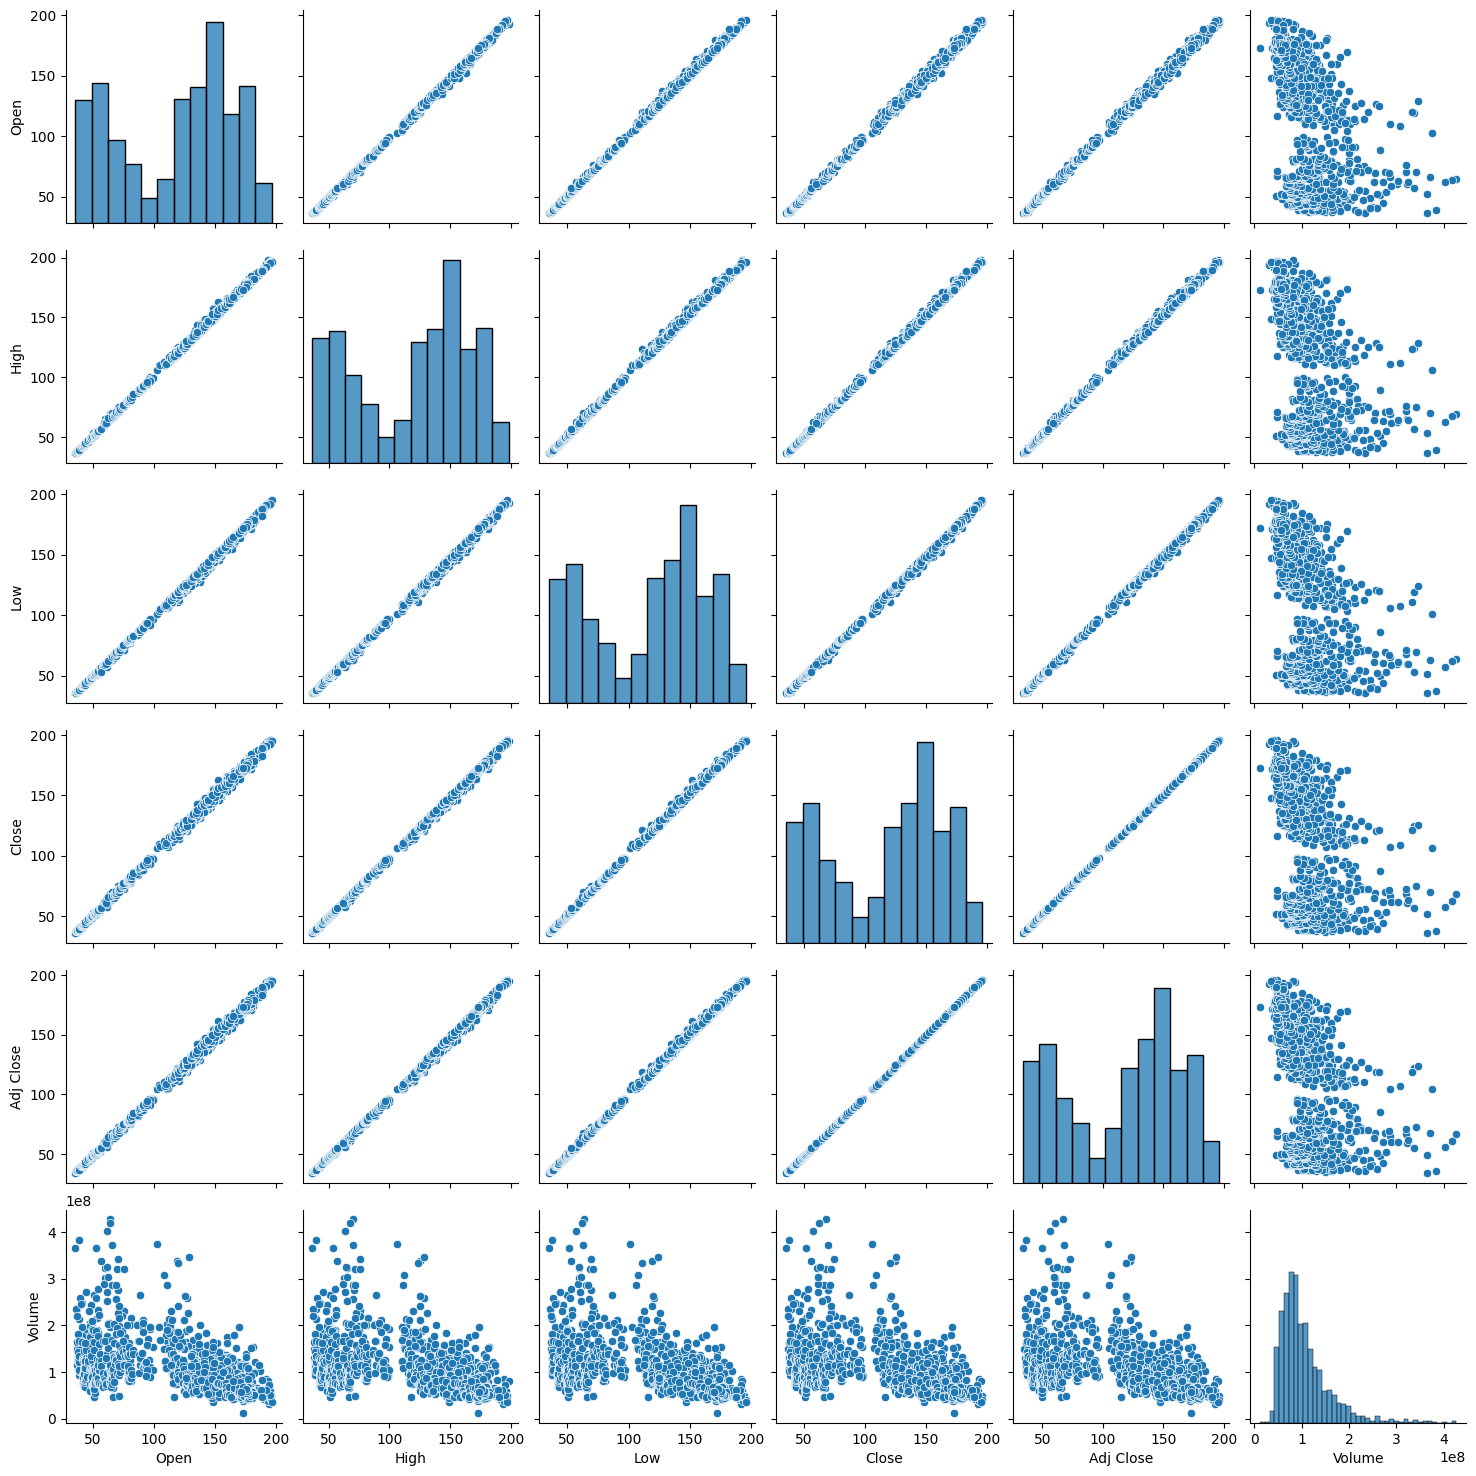

In [4]:
sns.pairplot(df)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,117.734903,119.121415,116.441260,117.840843,116.465042,1.062966e+08
std,46.889365,47.365688,46.438268,46.914499,47.210283,5.492164e+07
min,35.994999,36.430000,35.500000,35.547501,34.163818,1.184550e+07
25%,69.258751,70.297499,68.097502,69.076876,67.545494,7.046592e+07
50%,130.755005,132.400002,129.300003,130.904999,129.219460,9.118445e+07
75%,153.787495,156.040001,152.250000,154.247501,153.368076,1.253798e+08
max,196.240005,198.229996,195.279999,196.449997,196.185074,4.265100e+08


<Axes: >

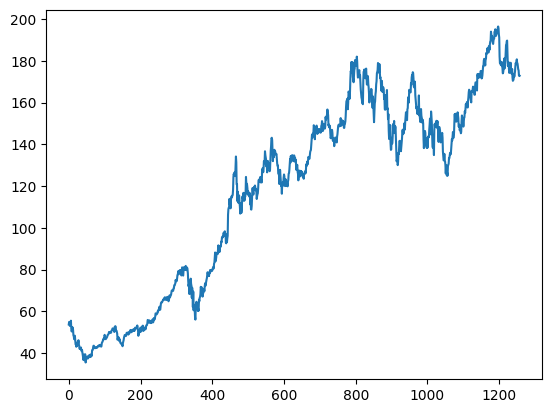

In [6]:
df['Close'].plot()

<Axes: >

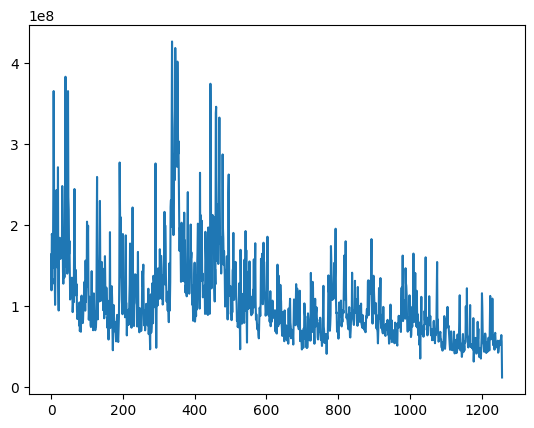

In [7]:
df['Volume'].plot()

Text(0.5, 1.0, 'APPLE')

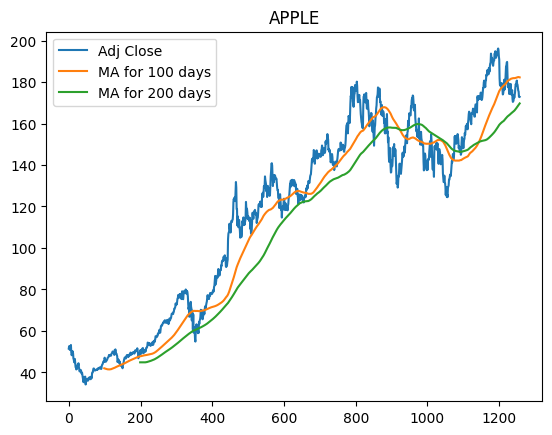

In [22]:
ma_day = [100,200]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Adj Close'].rolling(ma).mean()

df[['Adj Close', 'MA for 100 days', 'MA for 200 days']].plot().set_title('APPLE')

<Axes: >

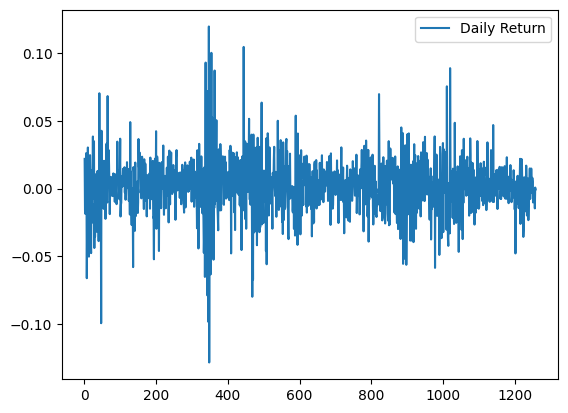

In [9]:
df['Daily Return'] = df['Adj Close'].pct_change()

df['Daily Return'].plot(legend=True)

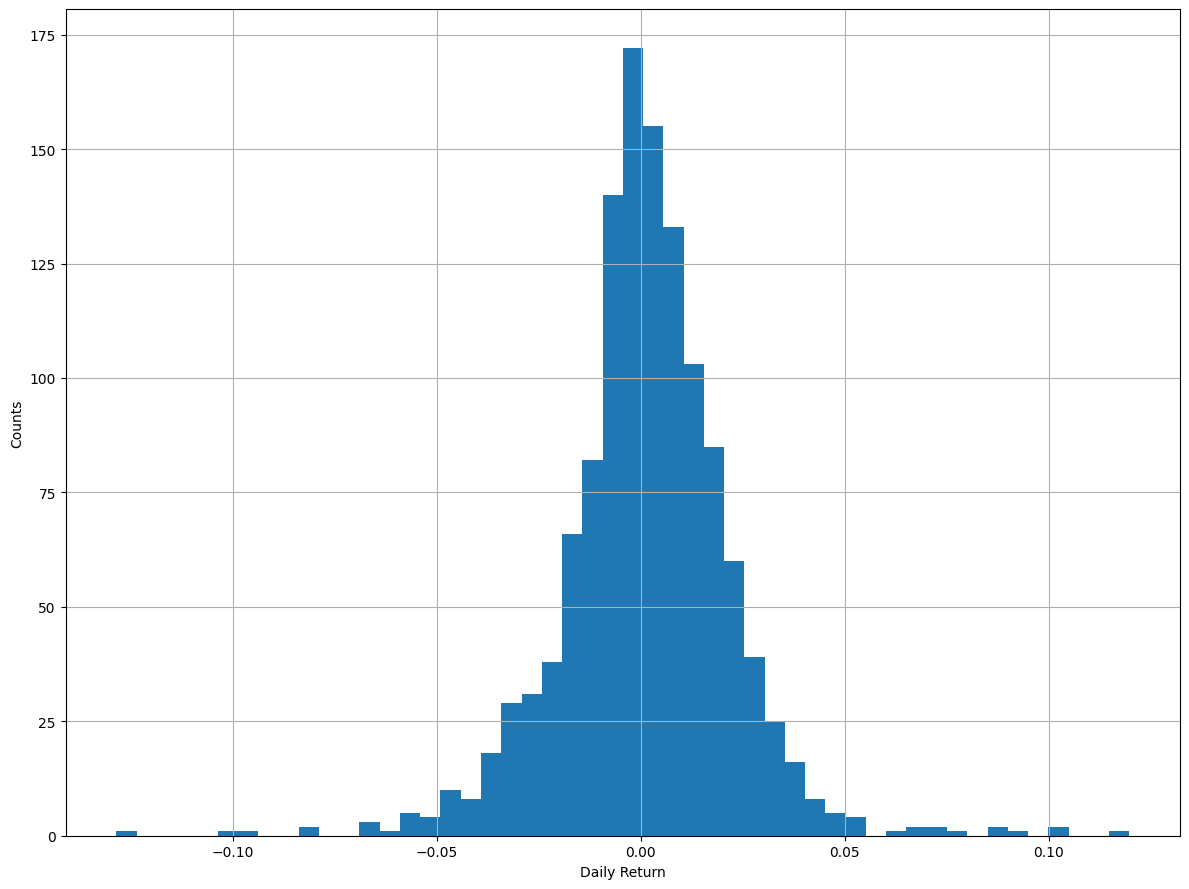

In [10]:
plt.figure(figsize=(12, 9))

df['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
    
plt.tight_layout()

In [11]:
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,MA for 100 days,MA for 200 days,Daily Return
199,2019-08-12,49.904999,50.512501,49.787498,50.119999,48.746487,89927600,47.726934,44.846468,-0.002537
200,2019-08-13,50.255001,53.035000,50.119999,52.242500,50.810822,188874000,47.764292,44.843023,0.042348
201,2019-08-14,50.790001,51.610001,50.647499,50.687500,49.298431,146189600,47.796274,44.826378,-0.029765
202,2019-08-15,50.865002,51.285000,49.917500,50.435001,49.052853,108909600,47.831374,44.812695,-0.004981
203,2019-08-16,51.070000,51.790001,50.959999,51.625000,50.210247,110481600,47.882753,44.809659,0.023595
...,...,...,...,...,...,...,...,...,...,...
1253,2023-10-18,175.580002,177.580002,175.110001,175.839996,175.839996,54764400,182.406862,168.733341,-0.007395
1254,2023-10-19,176.039993,177.839996,175.190002,175.460007,175.460007,59302900,182.409528,168.987947,-0.002161
1255,2023-10-20,175.309998,175.419998,172.639999,172.880005,172.880005,64189300,182.367719,169.223232,-0.014704
1256,2023-10-23,170.910004,174.009995,169.929993,173.000000,173.000000,55934300,182.327609,169.465787,0.000694


In [12]:
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil(len(dataset)*.95))

training_data_len

1196

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.11326734],
       [0.12058545],
       [0.11514738],
       ...,
       [0.85351382],
       [0.85425958],
       [0.85348271]])

In [14]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.11326734, 0.12058545, 0.11514738, 0.10883921, 0.11048617,
       0.11912494, 0.12434549, 0.10144341, 0.09229191, 0.09567907,
       0.10528114, 0.1030127 , 0.09676668, 0.08076319, 0.07774894,
       0.06931216, 0.07647489, 0.0797688 , 0.06785165, 0.05405446,
       0.05374372, 0.04676744, 0.05038765, 0.04979724, 0.06020727,
       0.05804758, 0.05654045, 0.06623577, 0.05360389, 0.05054303,
       0.04086326, 0.04258791, 0.04108078, 0.04181104, 0.04468544,
       0.0361865 , 0.03379376, 0.03710322, 0.02905486, 0.02274669,
       0.01326889, 0.00720933, 0.02327496, 0.02169014, 0.02181444,
       0.0241606 , 0.02444026, 0.        , 0.00943117, 0.00891843,
       0.01329998, 0.01727754, 0.01803888, 0.01569272, 0.01213467,
       0.01690466, 0.01981013, 0.02123957, 0.02273117, 0.01726201])]
[0.01822531656517376]

[array([0.11326734, 0.12058545, 0.11514738, 0.10883921, 0.11048617,
       0.11912494, 0.12434549, 0.10144341, 0.09229191, 0.09567907,
       0.10528114, 0.1030127 , 0.09

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=6)

Epoch 1/6
1136/1136 [==============================] - 24s 19ms/step - loss: 0.0029
Epoch 2/6
1136/1136 [==============================] - 23s 21ms/step - loss: 0.0011
Epoch 3/6
1136/1136 [==============================] - 22s 19ms/step - loss: 7.8347e-04
Epoch 4/6
1136/1136 [==============================] - 22s 19ms/step - loss: 7.2109e-04
Epoch 5/6
1136/1136 [==============================] - 23s 21ms/step - loss: 5.2356e-04
Epoch 6/6
1136/1136 [==============================] - 23s 20ms/step - loss: 5.0713e-04


In [16]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 18ms/step


2.477494702212811

C:\Users\naman\AppData\Local\Temp\ipykernel_13356\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


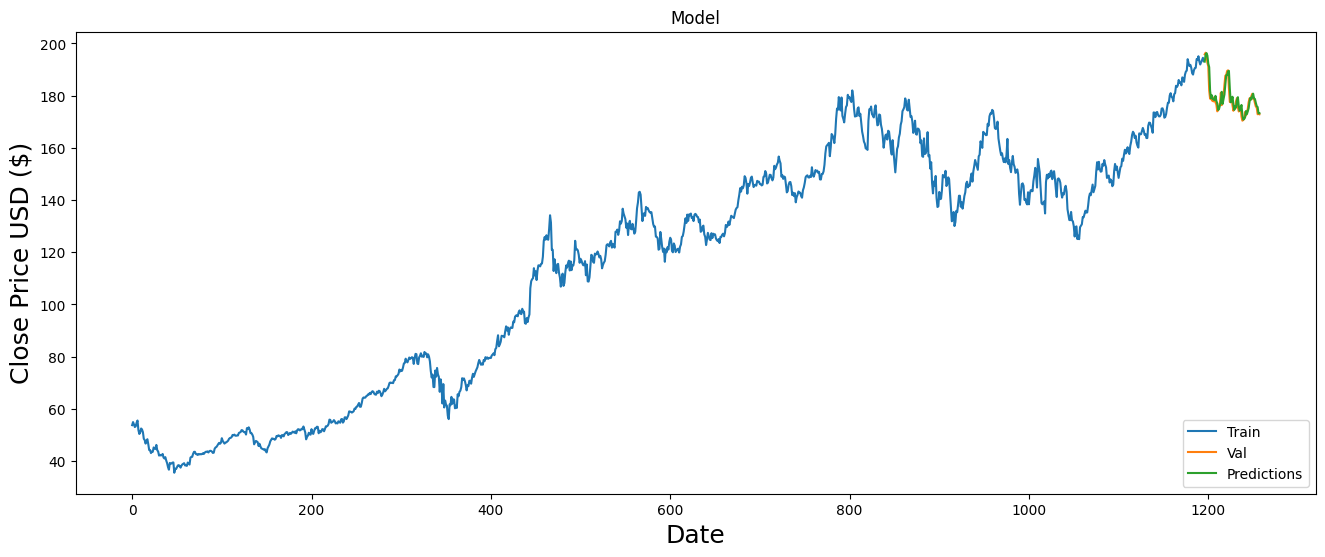

In [17]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()